# Question 2

In [7]:
import numpy as np
import scipy as sc
#defining A as the left-hand side of the array
A = np.array([[2, 4, 6], [5, 3, 2], [7, 8, 9]])
print (A)
#defining vector B as the right-hand side of the array
B = np.array([[18], [13], [30]])
print (B)
#inversing matrix A to be brought to the right-hand side
C = sc.linalg.inv(A).dot(B)
print (C)
#Calculate the values respectively for x, y, z
D = sc.linalg.solve(A, B)
print (D)

[[2 4 6]
 [5 3 2]
 [7 8 9]]
[[18]
 [13]
 [30]]
[[ 4.5]
 [-7.5]
 [ 6.5]]
[[ 4.5]
 [-7.5]
 [ 6.5]]


# Question 1

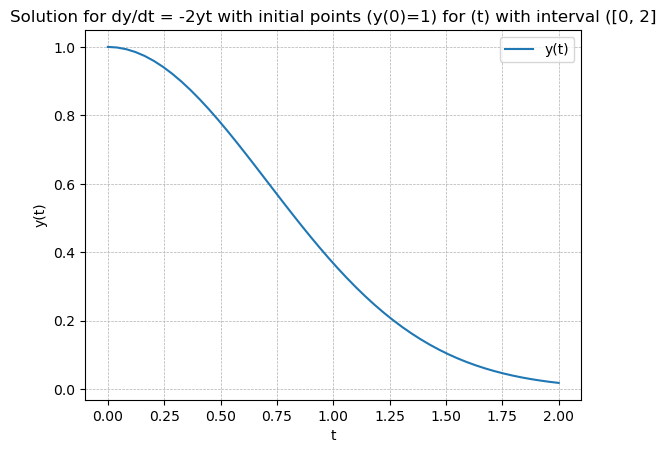

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE as a function
def model(y, t):
    dydt = -2 * y * t
    return dydt

#Set the initial condition given in question
y0 = 1.0

#Define the time interval as given in the question
t = np.linspace(0, 2)

#Use odeint to solve the ODE
solution = odeint(model, y0, t)

#Plotting the results
plt.figure()
plt.plot(t, solution, label='y(t)')
plt.title(f'Solution for dy/dt = -2yt with initial points (y(0)=1) for (t) with interval ([0, 2]')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Question 3

In [ ]:
import requests
import matplotlib.pyplot as plt

def get_weather_data(latitude, longitude, timezone, forecast_days):
    # API endpoint URL
    api_url = "https://api.open-meteo.com/v1/forecast"

    # Set parameters for the API request
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "timezone": timezone,
        "hourly": "temperature_2m",
        "forecast_days": forecast_days
    }

    # Send GET request to the API
    response = requests.get(api_url, params=params)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse JSON response
        data = response.json()

        # Extract temperature data and hourly time points from the response
        return data['hourly']['time'], data['hourly']['temperature_2m']
    else:
        # Print an error message if the request was not successful
        print(f"Error: Unable to fetch weather data. Status code: {response.status_code}")
        return None, None

def plot_temperature_trend(latitude, longitude, forecast_days, time_points, temperatures):
    # Format time points for better readability on the x-axis
    formatted_time_points = [f"{point['hour']}:{point['minute']:02d}" for point in time_points]

    # Plot the temperature trend using Matplotlib
    plt.figure(figsize=(12, 6))
    plt.plot(formatted_time_points, temperatures, marker='o', linestyle='-', color='b')
    plt.title(f"Temperature Trend for {forecast_days} Days\nLocation: Latitude {latitude}, Longitude {longitude}")
    plt.xlabel("Time (24-hour format)")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    while True:
        # User input for the number of forecast days
        forecast_days = int(input("Enter the number of forecast days (1-16), or enter 0 to exit: "))

        # Check if the user wants to exit
        if forecast_days == 0:
            print("Exiting the program. Goodbye!")
            break

        # Validate input
        if 1 <= forecast_days <= 16:
            # Coordinates and timezone for the location
            latitude, longitude, timezone = 2.375, 112.5, "Asia/Singapore"

            # Retrieve weather data for the specified number of forecast days
            time_points, temperatures = get_weather_data(latitude, longitude, timezone, forecast_days)

            # Check if data is retrieved successfully
            if time_points and temperatures:
                # Plot the temperature trend using Matplotlib
                plot_temperature_trend(latitude, longitude, forecast_days, time_points, temperatures)
        else:
            # Print an error message for invalid input
            print("Invalid input. Please enter a number of days between 1 and 16.")

if __name__ == "__main__":
    # Run the main function if the script is executed
    main()